In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.tree import DecisionTreeRegressor

# Problem Statement

In this data, we have one independent variable 'Temperature' and one dependent variable 'Revenue'. You have to build a DecisionTreeRegressor to study the relationship b/w the two variables and then predict the revenue for the ice cream shop based on the temperature on a particular day.

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv")

In [3]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

Text(0.5, 1.0, 'Temperature V/s Revenue')

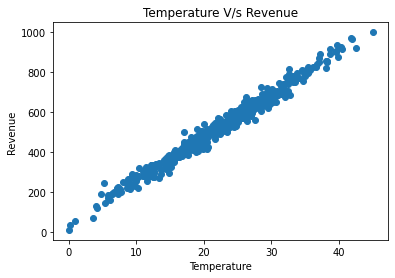

In [9]:
plt.scatter(df.Temperature,df.Revenue)
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.title("Temperature V/s Revenue")

<AxesSubplot:>

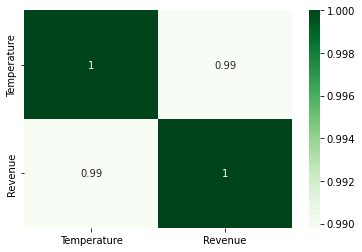

In [15]:
sns.heatmap(df.corr(),annot=True,cmap="Greens")  #<- This cmap is used to decide the color for the graph

<AxesSubplot:>

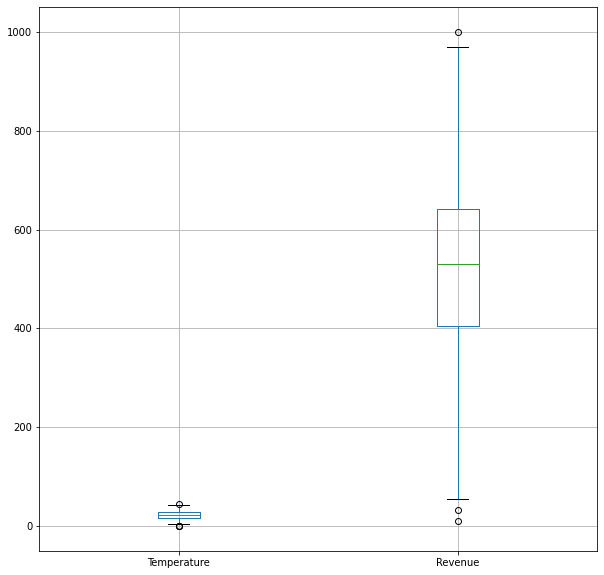

In [16]:
plt.figure(figsize=(10,10))
df.boxplot()

# Spliting of data - Training and Testing set

In [18]:
x=np.array(df.Temperature.values)
y=np.array(df.Revenue.values)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
len(x_train)

400

In [21]:
len(x_test)

100

In [23]:
len(y_train)

400

# Choosing the model

In [24]:
regressor = DecisionTreeRegressor()

# Training the model

In [26]:
regressor.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

DecisionTreeRegressor()

# Testing the model

In [28]:
y_pred=regressor.predict(x_test.reshape(-1,1))

# Comparing the y_test with y_pred

In [29]:
y_pred

array([322.9839774, 361.1191443, 394.1686196, 496.0119175, 428.8543561,
       460.4025002, 417.3548387, 361.1191443, 704.2814391, 594.3116748,
       530.7482251, 246.7871609, 553.1196514, 639.5380115, 507.900282 ,
       413.9140669, 541.2936627, 507.900282 , 639.5380115, 531.7424848,
       800.2024937, 782.0125497, 870.7659159, 528.1162401, 524.7463643,
       460.4025002, 542.8391063, 629.8937918, 706.3649044, 774.1080813,
       396.9356482, 454.1892673, 191.6233119, 344.6887652, 145.6253019,
       501.7329901, 570.9909316, 623.5988607, 689.8516908, 587.2212461,
       759.3774317, 875.0193476, 898.805423 , 520.8534562, 531.7424848,
       651.1862423, 383.9562396, 586.150568 , 537.113833 , 503.0842679,
       719.4717014, 774.1080813, 498.2521461, 737.8008241, 850.2469822,
       565.8749999, 430.3439033, 306.7499304, 875.0193476, 654.8949545,
       250.1317278, 662.5589903, 406.5792487, 581.0740052, 661.4675188,
       531.7424848, 516.5486011, 315.6465807, 774.1080813, 781.9

In [30]:
y_test

array([343.3629045 , 351.2888691 , 374.231135  , 521.6728037 ,
       390.8791194 , 429.4357021 , 498.7570498 , 323.9446718 ,
       684.8030705 , 572.6720474 , 538.1796842 , 242.2362083 ,
       501.34533   , 625.8046425 , 521.2673794 , 440.6778286 ,
       468.9751034 , 535.7089203 , 655.4339792 , 534.7990284 ,
       828.2960767 , 749.3671543 , 892.9477198 , 483.4897686 ,
       550.2785159 , 448.4713348 , 539.5277397 , 649.5611747 ,
       696.7166402 , 750.4447328 , 402.4553204 , 482.5719881 ,
       190.7109408 , 335.8156867 , 242.5098553 , 441.5087331 ,
       534.3645388 , 612.8037704 , 666.1368355 , 571.4342569 ,
       739.3872716 , 918.3912316 , 905.4776043 , 493.4202188 ,
       538.31289   , 631.3182368 , 395.2737497 , 588.5275513 ,
       578.3604354 , 521.7754452 , 642.2272909 , 797.566536  ,
       437.2519927 , 733.215828  , 856.3033039 , 569.6187562 ,
       436.9513113 , 280.5184674 , 926.0671533 , 651.5043041 ,
       212.5917401 , 636.298374  , 376.5544719 , 643.64

In [31]:
comp=pd.DataFrame({"Actual Values": y_test.reshape(-1),
                  "Predicted Values": y_pred.reshape(-1)})

In [32]:
comp

,Actual Values,Predicted Values
0,343.362905,322.983977
1,351.288869,361.119144
2,374.231135,394.168620
3,521.672804,496.011917
4,390.879119,428.854356
...,...,...
95,401.433018,409.402802
96,796.517685,804.260025
97,444.826802,476.794525
98,506.222379,448.930443


Text(0, 0.5, 'y_test/y_pred')

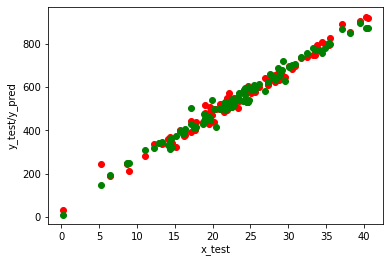

In [36]:
plt.scatter(x_test,y_test,color="red")
plt.scatter(x_test,y_pred,color="green")
plt.xlabel("x_test")
plt.ylabel("y_test/y_pred")

# Correlation between predicted and actual values

<AxesSubplot:>

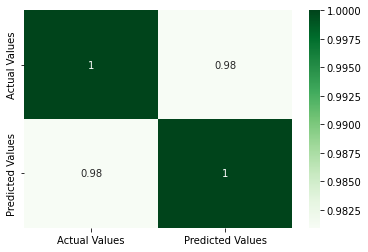

In [37]:
sns.heatmap(comp.corr(),annot=True,cmap="Greens")

<AxesSubplot:>

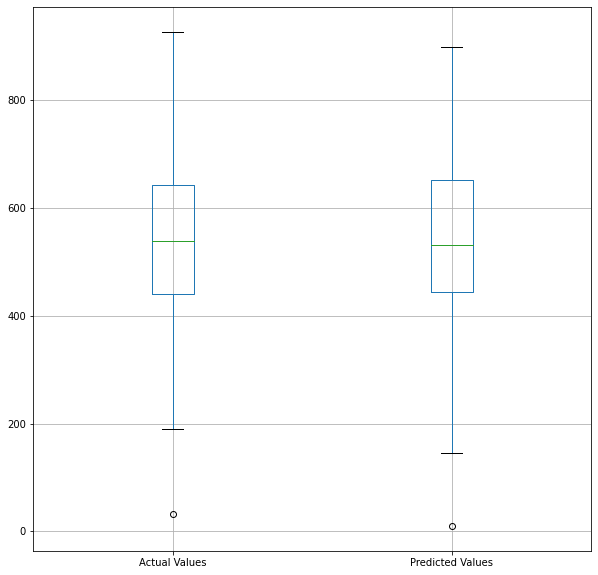

In [38]:
plt.figure(figsize=(10,10))
comp.boxplot()

# Check the performance

In [39]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [40]:
r2_score(y_test,y_pred)

0.961872168086537

In [41]:
mean_squared_error(y_test,y_pred)

1071.7223621495207

In [42]:
mean_absolute_error(y_test,y_pred)

25.425960956199997

In [45]:
regressor.score(x_test.reshape(-1,1),y_test)

0.961872168086537

In [ ]:
# you can say you have chosen the perfect model when and when you compare this model with another model and you got the highes value. only this model's accuracy value, you can't say that this model is perfect model.